In [101]:
# random.seed(69)
# genetic algorithm search for continuous function optimization
from numpy.random import randint
from numpy.random import rand
from numpy import random

# objective function
def objective(input):
  H = input[0]
  L = input[1]
  W = 3044 + H - L
  P = 1292 * W
  I = 2198380 + P - 5357118
	
  return 5.33*P + 7*W + 4*H + 2*L + 4.26*I
 
# decode bitstring to numbers
def decode(bounds, n_bits, bitstring):
  decoded = list()
  largest = 2**n_bits

  #print(bitstring)

  for i in range(len(bounds)):

    # extract the substring
    start, end = i * n_bits, (i * n_bits)+n_bits
    substring = bitstring[start:end]

    # convert bitstring to a string of chars
    chars = ''.join([str(s) for s in substring])

    # convert string to integer
    integer = int(chars, 2)

    # scale integer to desired range
    value = bounds[i][0] + (integer/largest) * (bounds[i][1] - bounds[i][0])

    # store
    decoded.append(value)

  return decoded
 
# tournament selection
def selection(pop, scores, k=3):
	# first random selection
	selection_ix = randint(len(pop))
 
	for ix in randint(0, len(pop), k-1):
		# check if better (e.g. perform a tournament)
		if scores[ix] < scores[selection_ix]:
			selection_ix = ix
	return pop[selection_ix]
 
# crossover two parents to create two children
def crossover(p1, p2, r_cross):
	# children are copies of parents by default
	c1, c2 = p1.copy(), p2.copy()
 
	# check for recombination
	if rand() < r_cross:
		# select crossover point that is not on the end of the string
		pt = randint(1, len(p1)-2)
  
		# perform crossover
		c1 = p1[:pt] + p2[pt:]
		c2 = p2[:pt] + p1[pt:]
	return [c1, c2]
 
# mutation operator
def mutation(bitstring, r_mut):
	for i in range(len(bitstring)):
		# check for a mutation
		if rand() < r_mut:
			# flip the bit
			bitstring[i] = 1 - bitstring[i]
 
# genetic algorithm
def genetic_algorithm(objective, bounds, n_bits, n_iter, n_pop, r_cross, r_mut):
  # initial population of random bitstring
  pop = [randint(0, 2, n_bits*len(bounds)).tolist() for _ in range(n_pop)]

  # keep track of best solution
  best, best_eval = 0, objective(decode(bounds, n_bits, pop[0]))
  all_scores = []

  # enumerate generations
  for gen in range(n_iter):
    # decode population
    decoded = [decode(bounds, n_bits, p) for p in pop]

    scores = []

    # evaluate all candidates in the population
    for d in decoded:
      H = d[0]
      L = d[1]
      W = 3044 + H - L
      P = 1292 * W
      I = 2198380 + P - 5357118

      if H>0 and L>0 and W>0 and P>0 and I>0:
        scores.append(objective(d))
      else:
        scores.append(1000000000000)
      

    # check for new best solution
    for i in range(n_pop):
      if scores[i] < best_eval:
        best, best_eval = pop[i], scores[i]
        print(">%d, new best f(%s) = %f" % (gen,  decoded[i], scores[i]))

    all_scores.append(best_eval)
    # select parents
    selected = [selection(pop, scores) for _ in range(n_pop)]

    # create the next generation
    children = list()
    for i in range(0, n_pop, 2):
    
      # get selected parents in pairs
      p1, p2 = selected[i], selected[i+1]

      # crossover and mutation
      for c in crossover(p1, p2, r_cross):
        # mutation
        mutation(c, r_mut)
    
        # store for next generation
        children.append(c)
    
    # replace population
    pop = children

  return [best, best_eval, all_scores]

# define range for input
bounds = [[0.0, 1000], 
          [0.0, 1000]]

# define the total iterations
n_iter = 100

# bits per variable
n_bits = 16

# define the population size
n_pop = 100

# crossover rate
r_cross = 0.5

# mutation rate
r_mut = 8.0 / (float(n_bits) * len(bounds))

# perform the genetic algorithm search
best, score, all_score = genetic_algorithm(objective, bounds, n_bits, n_iter, n_pop, r_cross, r_mut)
print('Done!')
decoded = decode(bounds, n_bits, best)
print('f(%s) = %f' % (decoded, score))
H = decoded[0]
L = decoded[1]
W = 3044 + H - L
P = 1292 * W
I = 2198380 + P - 5357118

print(P, W, H, L, I)

>0, new best f([651.6571044921875, 911.1480712890625]) = 21068543.191709
>0, new best f([182.2662353515625, 626.6326904296875]) = 18774143.404111
>0, new best f([284.4085693359375, 765.289306640625]) = 18322151.505918
>0, new best f([481.8267822265625, 979.1259765625]) = 18119824.643125
>0, new best f([104.98046875, 608.09326171875]) = 18045502.382383
>0, new best f([245.391845703125, 765.2740478515625]) = 17838483.328428
>0, new best f([371.7193603515625, 908.6456298828125]) = 17627975.305967
>1, new best f([40.771484375, 596.86279296875]) = 17388433.593320
>1, new best f([183.41064453125, 758.6212158203125]) = 17152300.813779
>1, new best f([178.009033203125, 761.4593505859375]) = 17050134.444150
>1, new best f([179.19921875, 776.9927978515625]) = 16872352.840146
>16, new best f([198.394775390625, 796.8597412109375]) = 16864145.987119
>19, new best f([378.4027099609375, 977.1881103515625]) = 16861254.158506
>22, new best f([165.6951904296875, 764.7247314453125]) = 16856951.721982
>57

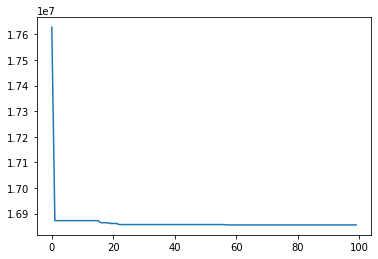

In [102]:
import matplotlib.pyplot as plt

plt.plot(all_score)

>0, new best f([651.6571044921875, 911.1480712890625]) = 21068543.191709
>0, new best f([182.2662353515625, 626.6326904296875]) = 18774143.404111
>0, new best f([284.4085693359375, 765.289306640625]) = 18322151.505918
>0, new best f([481.8267822265625, 979.1259765625]) = 18119824.643125
>0, new best f([104.98046875, 608.09326171875]) = 18045502.382383
>0, new best f([245.391845703125, 765.2740478515625]) = 17838483.328428
>0, new best f([371.7193603515625, 908.6456298828125]) = 17627975.305967
>1, new best f([40.771484375, 596.86279296875]) = 17388433.593320
>1, new best f([183.41064453125, 758.6212158203125]) = 17152300.813779
>1, new best f([178.009033203125, 761.4593505859375]) = 17050134.444150
>1, new best f([179.19921875, 776.9927978515625]) = 16872352.840146
>16, new best f([198.394775390625, 796.8597412109375]) = 16864145.987119
>19, new best f([378.4027099609375, 977.1881103515625]) = 16861254.158506
>22, new best f([165.6951904296875, 764.7247314453125]) = 16856951.721982
>57, new best f([32.9132080078125, 631.988525390625]) = 16855587.619199
Done!
f([32.9132080078125, 631.988525390625]) = 16855587.619199
3158842.6899414062 2444.9246826171875 32.9132080078125 631.988525390625 104.68994140625

20213045.207089845

In [103]:
%%timeit
# random.seed(69)
# genetic algorithm search for continuous function optimization
from numpy.random import randint
from numpy.random import rand
from numpy import random

# objective function
def objective(input):
  H = input[0]
  L = input[1]
  W = 3044 + H - L
  P = 1292 * W
  I = 2198380 + P - 5357118
	
  return 5.33*P + 7*W + 4*H + 2*L + 4.26*I
 
# decode bitstring to numbers
def decode(bounds, n_bits, bitstring):
  decoded = list()
  largest = 2**n_bits

  #print(bitstring)

  for i in range(len(bounds)):

    # extract the substring
    start, end = i * n_bits, (i * n_bits)+n_bits
    substring = bitstring[start:end]

    # convert bitstring to a string of chars
    chars = ''.join([str(s) for s in substring])

    # convert string to integer
    integer = int(chars, 2)

    # scale integer to desired range
    value = bounds[i][0] + (integer/largest) * (bounds[i][1] - bounds[i][0])

    # store
    decoded.append(value)

  return decoded
 
# tournament selection
def selection(pop, scores, k=3):
	# first random selection
	selection_ix = randint(len(pop))
 
	for ix in randint(0, len(pop), k-1):
		# check if better (e.g. perform a tournament)
		if scores[ix] < scores[selection_ix]:
			selection_ix = ix
	return pop[selection_ix]
 
# crossover two parents to create two children
def crossover(p1, p2, r_cross):
	# children are copies of parents by default
	c1, c2 = p1.copy(), p2.copy()
 
	# check for recombination
	if rand() < r_cross:
		# select crossover point that is not on the end of the string
		pt = randint(1, len(p1)-2)
  
		# perform crossover
		c1 = p1[:pt] + p2[pt:]
		c2 = p2[:pt] + p1[pt:]
	return [c1, c2]
 
# mutation operator
def mutation(bitstring, r_mut):
	for i in range(len(bitstring)):
		# check for a mutation
		if rand() < r_mut:
			# flip the bit
			bitstring[i] = 1 - bitstring[i]
 
# genetic algorithm
def genetic_algorithm(objective, bounds, n_bits, n_iter, n_pop, r_cross, r_mut):
  # initial population of random bitstring
  pop = [randint(0, 2, n_bits*len(bounds)).tolist() for _ in range(n_pop)]

  # keep track of best solution
  best, best_eval = 0, objective(decode(bounds, n_bits, pop[0]))
  all_scores = []

  # enumerate generations
  for gen in range(n_iter):
    # decode population
    decoded = [decode(bounds, n_bits, p) for p in pop]

    scores = []

    # evaluate all candidates in the population
    for d in decoded:
      H = d[0]
      L = d[1]
      W = 3044 + H - L
      P = 1292 * W
      I = 2198380 + P - 5357118

      if H>0 and L>0 and W>0 and P>0 and I>0:
        scores.append(objective(d))
      else:
        scores.append(1000000000000)
      

    # check for new best solution
    for i in range(n_pop):
      if scores[i] < best_eval:
        best, best_eval = pop[i], scores[i]
        print(">%d, new best f(%s) = %f" % (gen,  decoded[i], scores[i]))

    all_scores.append(best_eval)
    # select parents
    selected = [selection(pop, scores) for _ in range(n_pop)]

    # create the next generation
    children = list()
    for i in range(0, n_pop, 2):
    
      # get selected parents in pairs
      p1, p2 = selected[i], selected[i+1]

      # crossover and mutation
      for c in crossover(p1, p2, r_cross):
        # mutation
        mutation(c, r_mut)
    
        # store for next generation
        children.append(c)
    
    # replace population
    pop = children

  return [best, best_eval, all_scores]

# define range for input
bounds = [[0.0, 1000], 
          [0.0, 1000]]

# define the total iterations
n_iter = 100

# bits per variable
n_bits = 16

# define the population size
n_pop = 100

# crossover rate
r_cross = 0.5

# mutation rate
r_mut = 8.0 / (float(n_bits) * len(bounds))

# perform the genetic algorithm search
best, score, all_score = genetic_algorithm(objective, bounds, n_bits, n_iter, n_pop, r_cross, r_mut)
print('Done!')
decoded = decode(bounds, n_bits, best)
print('f(%s) = %f' % (decoded, score))
H = decoded[0]
L = decoded[1]
W = 3044 + H - L
P = 1292 * W
I = 2198380 + P - 5357118

print(P, W, H, L, I)

>0, new best f([38.6962890625, 93.68896484375]) = 23599679.003477
>0, new best f([16.66259765625, 411.9110107421875]) = 19381981.665830
>0, new best f([322.4029541015625, 784.9884033203125]) = 18549154.690732
>0, new best f([447.174072265625, 956.9549560546875]) = 17964902.691221
>0, new best f([361.358642578125, 944.8394775390625]) = 17050856.267881
>0, new best f([274.932861328125, 870.9716796875]) = 16894677.992734
>0, new best f([213.2110595703125, 809.478759765625]) = 16891470.607480
>2, new best f([164.4744873046875, 762.0086669921875]) = 16875479.820127
>6, new best f([61.676025390625, 659.698486328125]) = 16868810.646543
>18, new best f([68.6187744140625, 667.755126953125]) = 16855045.304746
Done!
f([68.6187744140625, 667.755126953125]) = 16855045.304746
3158763.8325195312 2444.8636474609375 68.6187744140625 667.755126953125 25.83251953125
>0, new best f([435.0128173828125, 338.0584716796875]) = 25485482.779111
>0, new best f([96.9696044921875, 521.4385986328125]) = 19020266.22

In [104]:
%%timeit
class Swarm:
  def __init__(self, func, *vars):
    self.position = list(vars)
    self.velocity = [0 for i in range(len(vars))]
    self.pbest = list(vars)
    self.fitness = func(vars)
    self.funcobj = func
  
  def updatePos(self):
    tempH= self.velocity[2] + self.position[2]
    tempL= self.velocity[3] + self.position[3]
    tempW= 3044+tempH-tempL
    tempP= 1292*tempW
    tempI= 2198380+tempP-5357118
    
    if tempW<0 or tempP<0 or tempI<0 or tempH<0 or tempI<0:
      return

    self.position[2]= tempH
    self.position[3]= tempL
    self.position[1]= tempW
    self.position[0]= tempP
    self.position[4]= tempI
  
  def updateFit(self):
    self.fitness = self.funcobj(self.position)
  
  def updatePbest(self):
    if self.funcobj(self.position)<self.funcobj(self.pbest):
      self.pbest = self.position
  
  def printSwarm(self):
    print("position :", *self.position)
    print("velocity :", *self.velocity)
    print("fitness :", self.fitness)
    print("pbest :", self.pbest)

class PSO:
  def __init__(self, n, omega, func, iteration, c1, c2):
    self.n = n
    self.omega = omega
    self.funcobj = func
    self.c1 = c1
    self.c2 = c2
    self.gbest = None
    self.swarms = []
    self.iteration = iteration
    self.listfitGbest=[]
    self.maxiter=0
  
  def initialize(self):
    h=np.random.uniform(100,300,self.n).tolist()
    l=np.random.uniform(100,300,self.n).tolist()
    w=[]
    for i in range(self.n):
      tempw = 3044+h[i]-l[i]
      w.append(tempw)
    p=[]
    for i in range(self.n):
      tempp = 1292*w[i]
      p.append(tempp)
    i=[]
    for j in range(self.n):
      tempi = 2198380+p[j]-5357118
      i.append(tempi)
    for j in range(self.n):
      tempSwarm = Swarm(self.funcobj,p[j],w[j],h[j],l[j],i[j])
      self.swarms.append(tempSwarm)

  def updateGbest(self, iter):
    for swarm in self.swarms:
      if self.gbest == None:
        self.gbest = swarm.pbest
      if self.funcobj(swarm.pbest)<self.funcobj(self.gbest):
        self.gbest = swarm.pbest
        self.maxiter = iter

  def updateVelocity(self):
    for swarm in self.swarms:
      for i in range(len(swarm.position)):
        if i==0 or i==1 or i==4:
          continue
        iner = self.omega*swarm.velocity[i]
        knowl = self.c1*random.random()*(swarm.pbest[i]-swarm.position[i])
        soc = self.c2*random.random()*(self.gbest[i] - swarm.position[i])
        swarm.velocity[i] = iner + knowl + soc
  
  def printPSO(self):
    print("n: ", self.n)
    print("omega: ", self.omega)
    print("c1: ", self.c1)
    print("c2: ", self.c2)
    print("maxiter: ", self.maxiter)
    print("gbest: ", self.gbest)
    print("gbest fitness: ", self.funcobj(self.gbest))
    plt.plot(self.listfitGbest)


  def run(self):
    self.initialize()
    for i in range(self.iteration):
      print(i)
      for swarm in self.swarms:
        #swarm.printSwarm()
        swarm.updateFit()
        swarm.updatePbest()    
      self.updateGbest(i)
      self.listfitGbest.append(self.funcobj(self.gbest))
      print(self.gbest)
      print(self.funcobj(self.gbest))
      self.updateVelocity()
      for swarm in self.swarms:
        swarm.updatePos()

def problem(input):
  output=5.33*input[0]+7*input[1]+4*input[2]+2*input[3]+4.26*input[4]
  return output

solveWithPSO = PSO(100, 1, problem, 100, 2, 2)
solveWithPSO.run()
print(len(solveWithPSO.listfitGbest))

0
[3719504.9305221997, 2878.873785233901, 134.04990579617274, 299.1761205622721, 560766.9305221997]
22235115.072068844
1
[3512771.071280272, 2718.8630582664646, 42.77396520884946, 367.91090694238494, 354033.0712802727]
20251189.652660396
2
[3164108.4847942763, 2449.000375227768, 46.15030533246957, 641.1499301047016, 5370.484794275835]
16906186.39288524
3
[3164108.4847942763, 2449.000375227768, 46.15030533246957, 641.1499301047016, 5370.484794275835]
16906186.39288524
4
[3164108.4847942763, 2449.000375227768, 46.15030533246957, 641.1499301047016, 5370.484794275835]
16906186.39288524
5
[3164108.4847942763, 2449.000375227768, 46.15030533246957, 641.1499301047016, 5370.484794275835]
16906186.39288524
6
[3164108.4847942763, 2449.000375227768, 46.15030533246957, 641.1499301047016, 5370.484794275835]
16906186.39288524
7
[3164108.4847942763, 2449.000375227768, 46.15030533246957, 641.1499301047016, 5370.484794275835]
16906186.39288524
8
[3164108.4847942763, 2449.000375227768, 46.15030533246957,